In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## Geometric Trasformation
*Spatial Transformation:* These are transformations that are related to positions or cordinates of different pixels.

Transformations can be categorized into two:
- Linear Transformation: A function
- Non-linear Transformation

Scaling using OpenCV

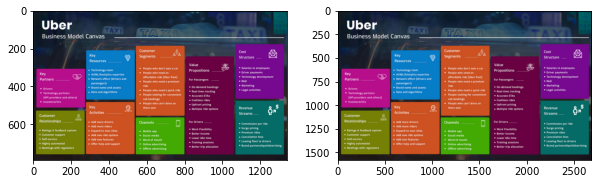

In [2]:
image = cv2.imread('images/business.jpg')
image_resized = cv2.resize(image, fx=2, fy=2, dsize=None)

plt.figure(figsize=(10,7))
plt.subplot(121)
plt.imshow(image)

plt.subplot(122)
plt.imshow(image_resized)

## Scaling as a matrix multiplication

Let's try to illustrate how scaling is applied on an image, like we said, scaling is a matrix multiplication

In [3]:
cordinate = np.array([2,4])
sx,sy = 2,2 # scaler point

scaler = np.array([[sx, 0], [0, sy]])
result = scaler.dot(cordinate) # Matrix multiplication
result

array([4, 8])

Our resultant cordinate becomes `[4,8]` after scaling, this means our cordinates have been shifted twice from point of origin `[2,4]`

### 3D scaling Excerise

In [ ]:
cordinate = np.array([2,4,6])
sx, sy, sz = 3,0.5,2

scaler = np.array([[sx,0,0], [0,sy,0],[0,0,sz]])
result = scaler.dot(cordinate)
scaler, result

### Image Copying and Flipping
One of the challenges associated with scaling are continous cordinates. All cordinates are expected to be discrete in order to scale.

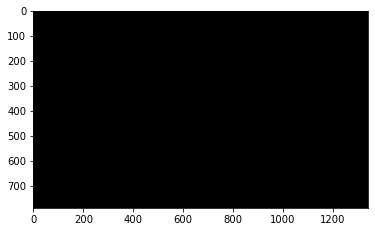

In [5]:
image = cv2.imread('images/business.jpg', cv2.IMREAD_GRAYSCALE)
image2 = np.zeros((image.shape[0], image.shape[1]), dtype='uint8')
plt.imshow(image2, cmap='gray')

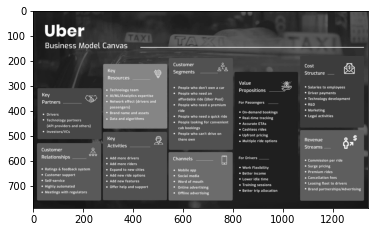

In [6]:
# Copying the image into our blank synthetic image

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        image2[i,j] = image[i,j]
plt.imshow(image2, cmap='gray')

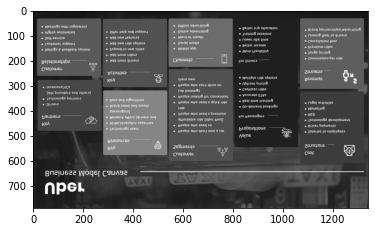

In [7]:
# Copying the image into our blank synthetic image and flipping it

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        image2[image.shape[0]-i-1,j] = image[i,j]
plt.imshow(image2, cmap='gray')

Flipping can similarly be done like this below

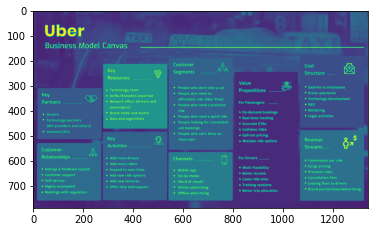

In [8]:
plt.imshow(image2[::-1, :])

## Excercise 
write a code to copy only half the row of the image

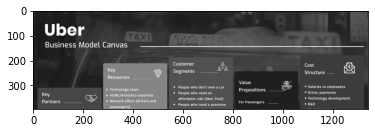

In [9]:
image2 = np.zeros((int(image.shape[0]/2), image.shape[1]), dtype=np.uint8)
for i in range(image.shape[0]//2):
    for j in range(image.shape[1]):
        image2[i,j] = image[i,j]

plt.imshow(image2, cmap='gray')

Another way much faster and efficient to do solve this excersice is this

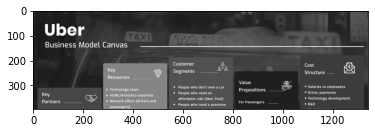

In [10]:
image2 = image[:image.shape[0]//2, :]
plt.imshow(image2, cmap='gray')

## Saturation and holes

In [11]:
new_image = np.zeros((2*image.shape[0], 2*image.shape[1]), dtype=np.uint8)
scaler = np.array([[2,0],[0,2]])

# Copy pixel intensities from from original image to new scaled image
for i in range(image.shape[0]):
    for j in range (image.shape[1]):
        cordinate = np.array([i,j])
        dot_scaler = scaler.dot(cordinate)
        new_i, new_j = dot_scaler
        new_image[new_i, new_j] = image[i,j]

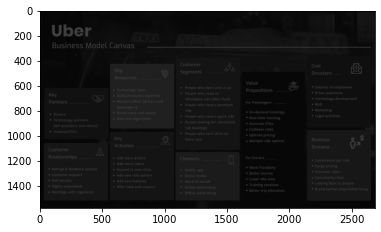

In [12]:
plt.imshow(new_image, cmap='gray')

Now, because our image isn't been displayed in it's actual size, let's create a function to help us visualize this image in its actual size

In [14]:
def display_image(image):
    dot_per_inch = mpl.rcParams['figure.dpi']
    height, width = image.shape[:2]
    fig = plt.figure(figsize=(height/int(dot_per_inch), width/int(dot_per_inch)))
    plt.imshow(image, cmap='gray')
    plt.show()
dpi = mpl.rcParams['figure.dpi']

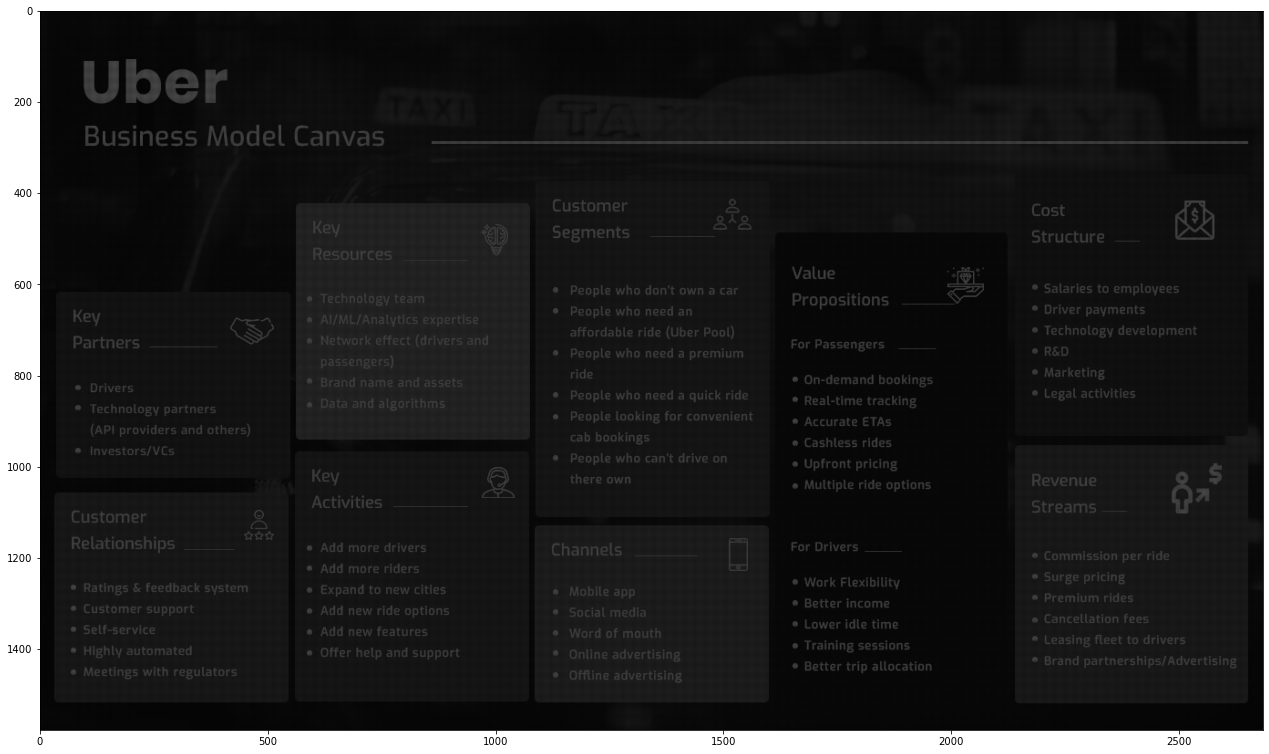

In [15]:
display_image(new_image)

In [16]:
scaler = np.array([[2,0],[0,2]])
inverse_scale = np.linalg.inv(scaler)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        cordinate = np.array([i,j])
        dot_cord = inverse_scale.dot(cordinate)
        new_i, new_j = np.int16(np.round(dot_cord))
        if i < image.shape[0] or i >=image.shape[0] or j<0 or j>=image.shape[1]:
            pass
        else:
            new_image[i,j] = image[new_i, new_j]

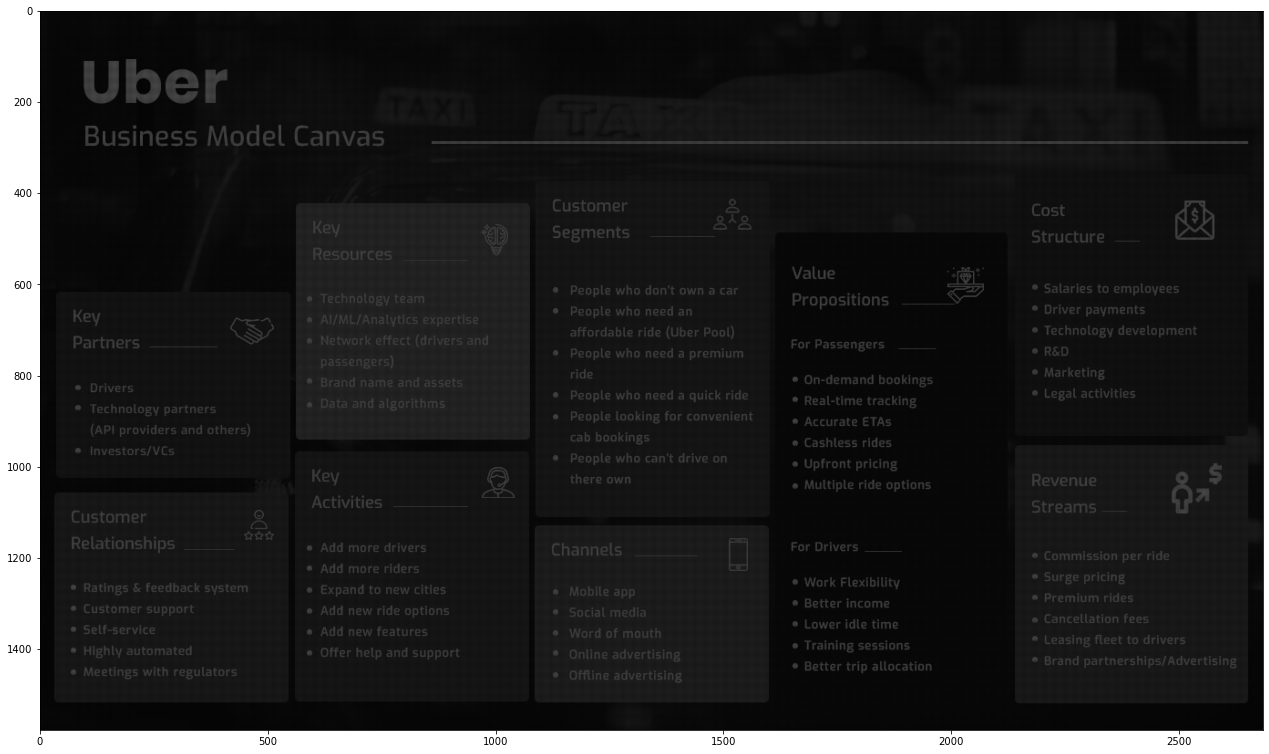

In [17]:
display_image(new_image)

## Algorithm for scaling an image
- Get an image
- setup the scale factors Sx and Sy
- Transform image extents to get the resultant image size
- Initialize the resultant image with all zeros or ones `(np.zeroes() or np.ones())`
- Computer the inverse transformation matrix
- Foreach pixel location `(a,b)` resultant image:
    - Apply inverse transformation on `(a,b)` an get `(c,d)` in the source image
    - Apply interpolation on `(c,d)` and get intensity `g`
    - Copy intensity `g` on location `(a,b)` in the resultant image

## Bilinear Interpolation Algorithm

In [82]:
def bilinear_interpolation(r,c,image):
    lc = int(c)
    rc = lc + 1
    wr = c - lc
    wl = rc - c
    tr = int(r)
    br = tr + 1
    wt = br - r
    wb = r - tr

    if tr>=0 and br < image.shape[0] and lc >=0 and rc < image.shape[1]:
        a = wl*image[tr,lc] + wr*image[tr,rc]
        b = wl*image[br,lc] + wr*image[br,rc]
        g = wt*a + wb*b
        return np.uint8(g)
    else:
        return 0

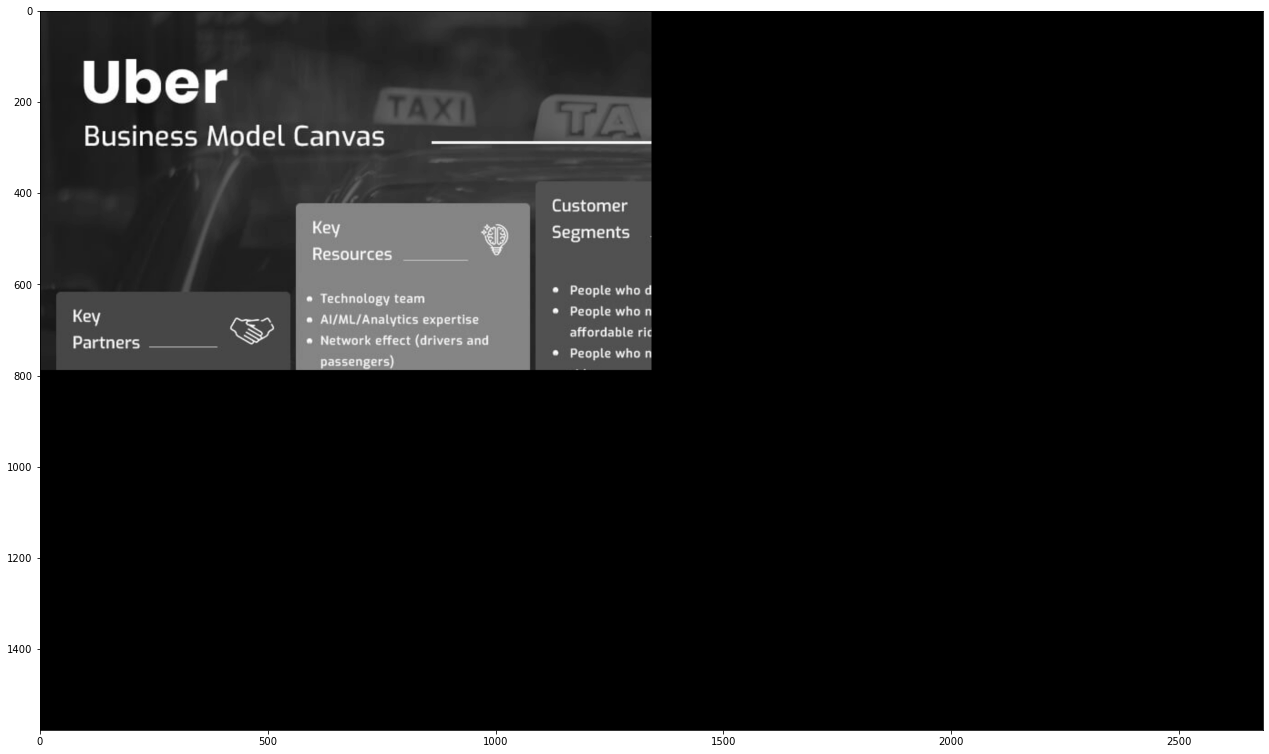

In [84]:
def bilinear_interpolation1(row, column, image):
    
    left_column = int(column)
    right_column = left_column +1
    weight_for_right_col = column - left_column
    weight_for_left_col = right_column - column
    
    top_row = int(row)
    bottom_row = top_row + 1
    weight_for_top_row = bottom_row - row
    weight_for_bottom_row = row - top_row
    
    # Check to see if we are within our image boundary
    if top_row >= 0 and bottom_row < image.shape[0] and left_column >= 0 and right_column<image.shape[1]:
        angle_a = weight_for_left_col * image[top_row, left_column] + weight_for_right_col * [top_row, right_column]
        angle_b = weight_for_left_col * image[bottom_row, left_column] + weight_for_right_col * [bottom_row, right_column]

        result = weight_for_top_row * angle_a + weight_for_bottom_row * angle_b
        return np.uint8(result)
    else:
        return 0

# Apply bilinear transformation to an image
image = cv2.imread('images/business.jpg', cv2.IMREAD_GRAYSCALE)
empty_image = np.zeros((2*image.shape[0], 2*image.shape[1]), dtype=np.uint8)
scaler = np.array([[2,0], [0,2]])
inverse_scaler = np.linalg.inv(scaler)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        point = np.array([i,j])
        dot_point = inverse_scaler.dot(point)
        new_i, new_j = dot_point

        if i < 0 or i >=image.shape[0] or j<0 or j>=image.shape[1]:
            pass
        else:
            g = bilinear_interpolation(new_i,new_j, image)
            empty_image[i, j] = g

display_image(empty_image)

In [20]:
from config import BilinearInterpolation
image = cv2.imread('images/business.jpg', cv2.IMREAD_GRAYSCALE)
bilinear = BilinearInterpolation(image, [2,2])
bilinear.core_transform() # for some weird reasons, this keeps returning a an error 🤦🏽‍♂️

array([[39., 39., 39., ...,  0.,  0.,  0.],
       [39., 39., 39., ...,  0.,  0.,  0.],
       [39., 39., 39., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

### Exercise
- Write a function in python to compute the resultant image size with respect to the given transformation
- Extend your code to handle colored

In [85]:
def get_scaling_matrix(scale):
    size = len(scale)
    matrix = np.zeros((size, size))
    for i, j in enumerate(matrix):
        matrix[i][i] = scale[i]
    return matrix

In [86]:
def scale_image(scale:list, image):
    empty_image = np.zeros((scale[0]*image.shape[0], scale[1]*image.shape[1]), dtype=np.uint8)
    scale = get_scaling_matrix(scale)
    inverse_scale = np.linalg.inv(scale)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            point = np.array([i,j])
            dot_point = inverse_scale.dot(point)
            new_i, new_j = dot_point
            if i < 0 or i>=image.shape[0] or j<0 or j>=image.shape[1]:
                pass
            else:
                empty_image[i,j] = bilinear_interpolation(new_i, new_j, image)

image = cv2.imread('images/business.jpg', cv2.IMREAD_GRAYSCALE)
scale_image([2,2], image)

TypeError: Image data of dtype object cannot be converted to float

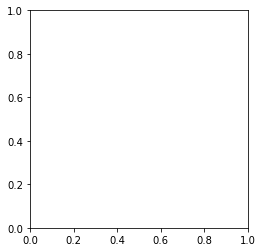

In [87]:
def transform_rgb(image):
    r = scale_image(image=image[:,:,0],scale=[2,2])
    g = scale_image(image=image[:,:,1],scale=[2,2])
    b = scale_image(image=image[:,:,2],scale=[2,2])

    new_image = r,g,b
    return plt.imshow(np.asarray(new_image))

image = plt.imread('images/business.jpg')
transform_rgb(image=image)

### Rotation Algorithm
Rotation is a linear transformation
[r',c'] = [[cos∅, -sin∅],[sin∅, cos∅]][r,c] #Formular

Although it comes with some challenges while trying to achieve it like `Handling Index Shifting`

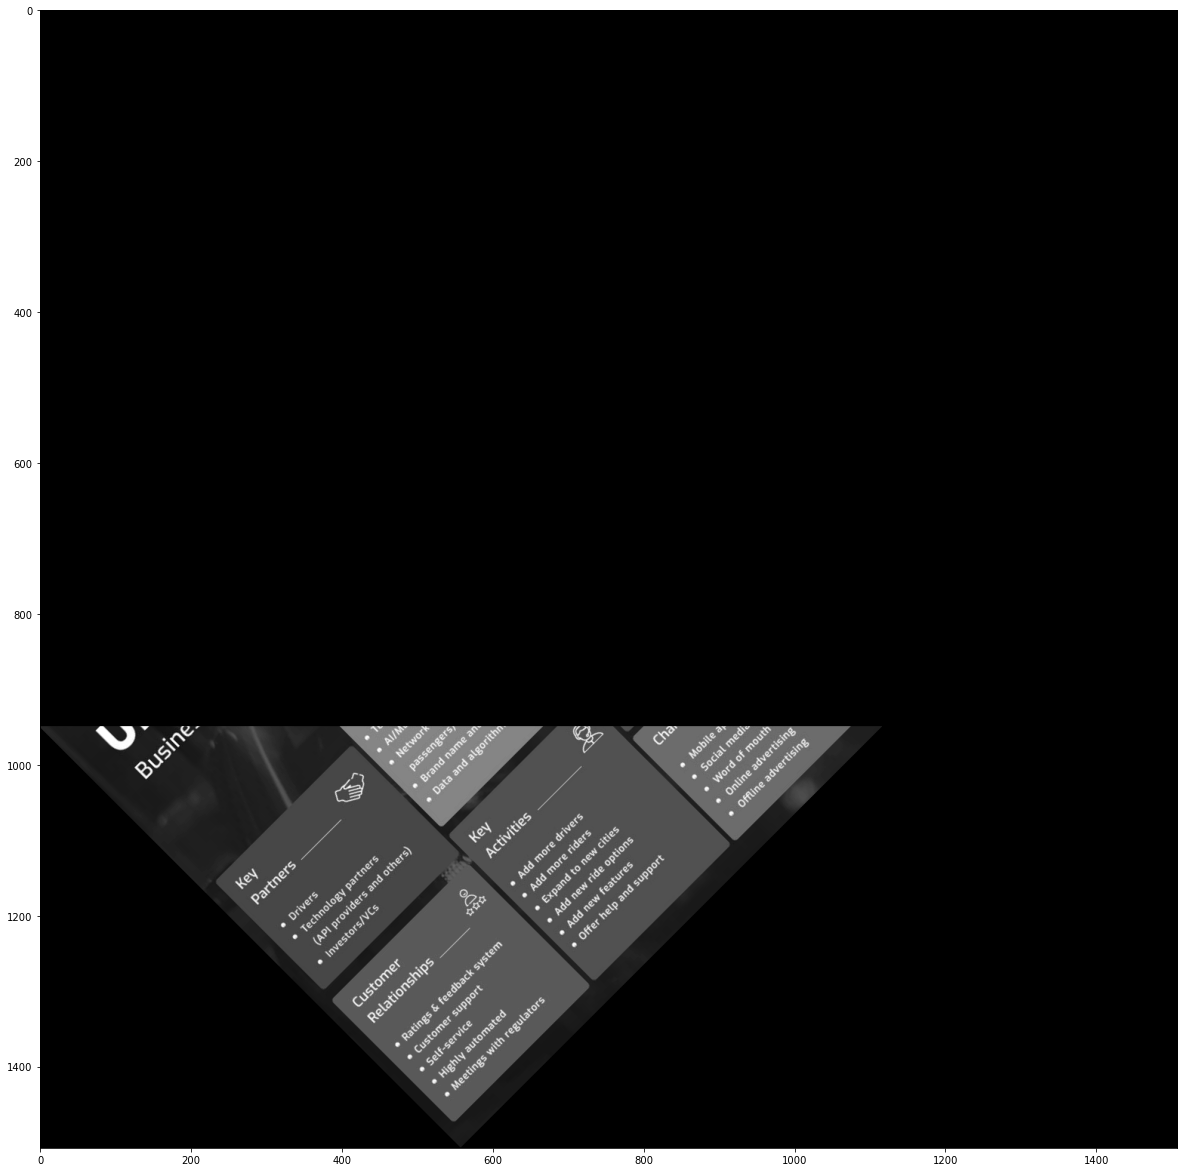

In [88]:
from config import BilinearInterpolation
image = cv2.imread('images/business.jpg', cv2.IMREAD_GRAYSCALE)
bilinear = BilinearInterpolation(image, [1,1])

#Define rotation in degrees and convert to radian for numpy 
angle = 45
cos = np.cos(np.deg2rad(angle))
sin = np.cos(np.deg2rad(angle))

scale = np.array([[cos, -sin],[sin, cos]])
row, col = image.shape[:2]
cordinate = np.array([[0,0],[0,col-1],[row-1,0],[row-1,col-1]])
dot_cord = scale.dot(cordinate.T)

minimums = dot_cord.min(axis=1)
maximums = dot_cord.max(axis=1)

min_row = np.int64(np.floor(minimums[0]))
min_col = np.int64(np.floor(minimums[1]))

max_row = np.int64(np.ceil(maximums[0]))
max_col = np.int64(np.ceil(maximums[1]))

row = max_row - min_row +1
col = max_col - min_col +1

# Create empty image 
empty_image = np.zeros((row, col), dtype=np.uint8)
scale_inverse = np.linalg.inv(scale) # Index shifting

for i in range(min_row, max_row):
    for j in range(min_col, max_col):
        point = np.array([i,j])
        dot_point = scale_inverse.dot(point)
        new_i, new_j = dot_point
        if i<0 or i>=image.shape[0] or j<0 or j>=image.shape[1]:
            pass
        else:
            bilinear_interpol = bilinear_interpolation(new_i, new_j, image)
            empty_image[i-min_row, j-min_col] = bilinear_interpol

display_image(empty_image)


### Wrap the whole rotation transformation in a function to be more generic

In [89]:
def rotation_transform(image, angle=45):
    
    cos = np.cos(np.deg2rad(angle))
    sin = np.sin(np.deg2rad(angle))

    scale = np.array([[cos, -sin], [sin,cos]])
    row, col = image.shape[0], image.shape[1]
    cords = np.array([[0,0], [0, col-1],[row-1,0], [row-1, col-1]])

    dot_cord = scale.dot(cords.T)
    
    minimums = dot_cord.min(axis=1)
    maximums = dot_cord.max(axis=1)

    min_row = np.int64(np.floor(minimums[0]))
    min_col = np.int64(np.floor(minimums[1]))

    max_row = np.int64(np.ceil(maximums[0]))
    max_col = np.int64(np.ceil(maximums[1]))

    row = max_row - min_row +1
    col = max_col - min_col +1

    inverse_scale = np.linalg.inv(scale)
    empty_image = np.ones((row, col), dtype=np.uint8) * 255

    for i in range(min_row, max_row):
        for j in range(min_col, max_col):
            point = np.array([i,j])
            dot_point = inverse_scale.dot(point)
            new_i , new_j = dot_point

            if i<0 or i>=image.shape[0] or j<0 or j>=image.shape[1]:
                pass
            else:
                bilinear_interpol = bilinear_interpolation(new_i, new_j, image)
                empty_image[i-min_row, j-min_col] = bilinear_interpol
    return empty_image

    

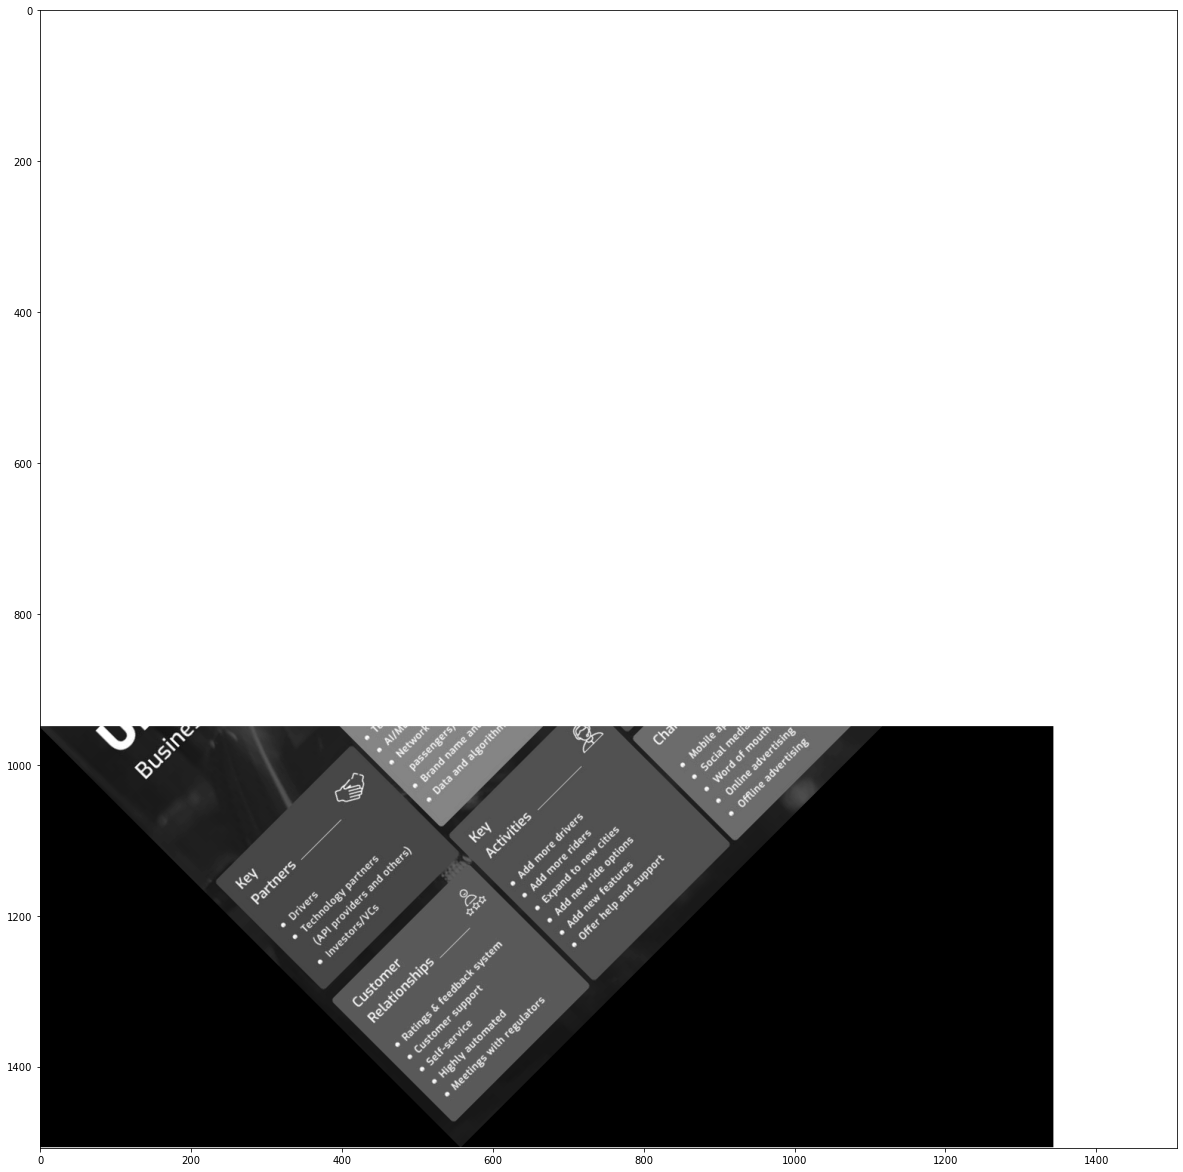

In [91]:
display_image(rotation_transform(image))

### Reflection Algorithm using Nearest Neighbor interpolation

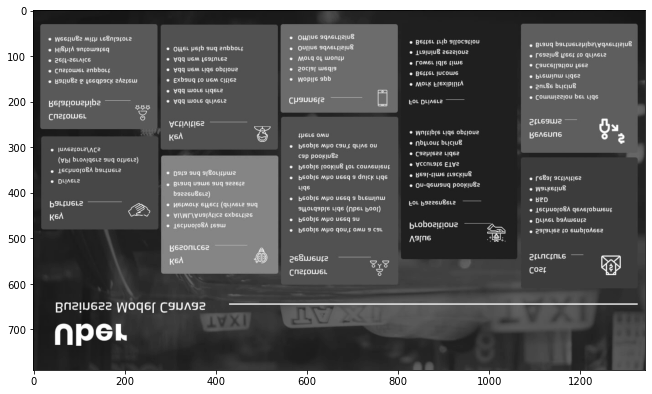

In [30]:
scaler = np.array([[-1, 0],[0,1]])
empty_image = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
inverse_scale = np.linalg.inv(scaler) #Without inverting the scale it still works

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        point = np.array([i,j])
        dot_point = np.int16(np.round(inverse_scale.dot(point)))

        new_i, new_j = dot_point
        if i<0 or i>=image.shape[0] or j<0 or j>=image.shape[1]:
            pass
        else:
            empty_image[i, j] = image[new_i,new_j]

display_image(empty_image)

Reflection can also be done using openCV

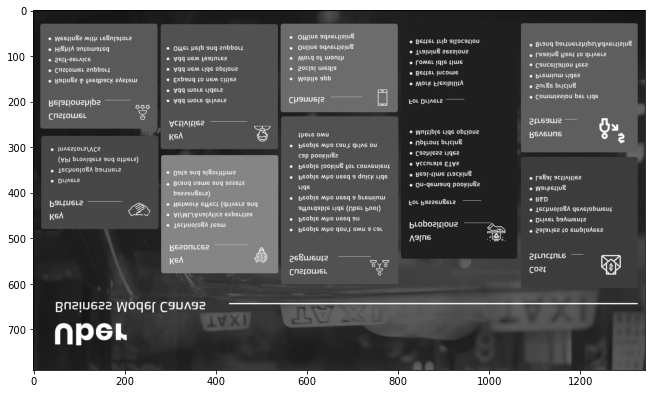

In [100]:
image = cv2.flip(image, 0)
display_image(image)

### Shear Transformation 
Shear transformatio in also a linear transformation because it's also achievable through matrix multiplication

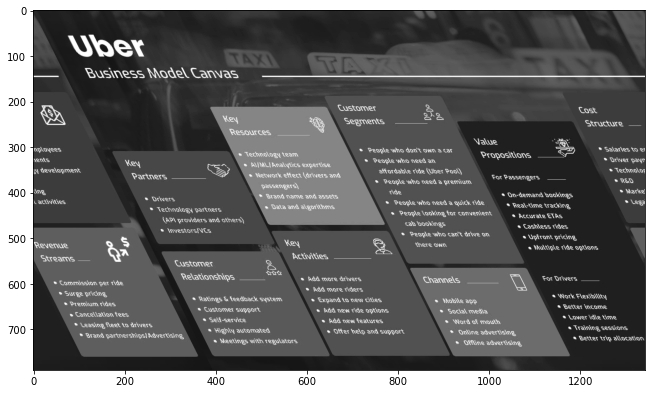

In [98]:
shear = 0.5
scale = np.array([[1,0],[shear, 1]])

def transform(scaler, image):
    empty_image = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    inverse_scale = np.linalg.inv(scaler)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            point = np.array([i,j])
            dot_point = np.int16(np.round(inverse_scale.dot(point)))

            new_i, new_j = dot_point
            if i<0 or i>=image.shape[0] or j<0 or j>=image.shape[1]:
                pass
            else:
                empty_image[i, j] = image[new_i,new_j]
    display_image(empty_image)

transform(scale, image)

### Translation transformation algorithm

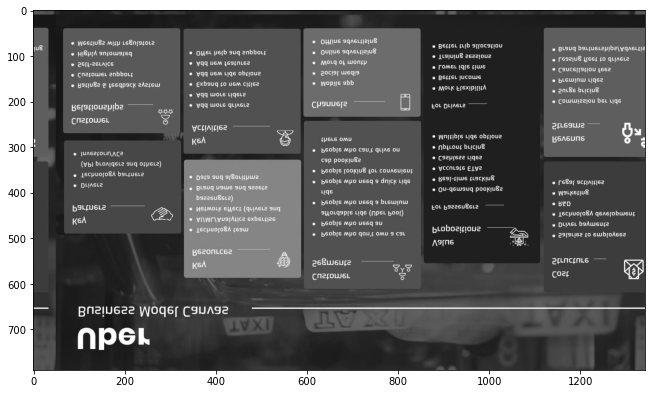

In [101]:
tr = 10
tc = 50
scaler = np.array([[1,0,tr], [0,1,tc],[0,0,1]])
empty_image = np.ones((image.shape[0],image.shape[1]), dtype=np.uint8)
inverse_scale = np.linalg.inv(scaler)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        point = np.array([i, j, 1])
        dot_point = np.int64(np.floor(inverse_scale.dot(point)))
        new_i, new_j, k = dot_point
        if i<0 or i>=image.shape[0] or j<0 or j>=image.shape[1]:
            pass
        else:
            empty_image[i,j] = image[new_i,new_j]
plt.imsave('Transformed-image.jpg',empty_image)
display_image(empty_image)

### Exercise: Create a function to TRANSLATE and ROTATE an Image at the same time

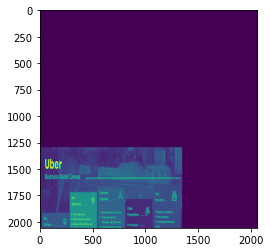

In [79]:
image = cv2.imread('images/business.jpg', cv2.IMREAD_GRAYSCALE)
def rotate_and_translate(scale, image, rotation_angle=45):

    cos = np.cos(np.deg2rad(rotation_angle))
    sin = np.cos(np.deg2rad(rotation_angle))

    row, col = image.shape[:2]
    rotation_scale = np.array([[cos, -sin, 1], [sin,cos,1],[0,0,1]])
    rotation_cord = np.array([[0,0,1],[0,col-1,1],[row-1,0,1],[row-1,col-1,1]]) #Created a homogenous cordinate to enable translation
    rotation_point = rotation_scale.dot(rotation_cord.T)
    
    minimums = rotation_point.min(axis=1)
    maximums = rotation_point.max(axis=1)
    
    min_row = np.int64(minimums[0])
    min_col = np.int64(minimums[1])

    max_row = np.int64(maximums[0])
    max_col = np.int64(maximums[1])

    new_row = max_row - min_row + 1
    new_col = max_col - min_col + 1
    
    empty_image = np.zeros((new_row, new_col), dtype=np.uint8)
    scale = np.linalg.inv(scale)
    
    for i in range(min_row, max_row):
        for j in range(min_col, max_col):
            point = np.array([i,j,1]) #add one to make it homogenous
            dot_point = np.int64(np.floor(scale.dot(point))) 
            new_i, new_j = dot_point[0], dot_point[1]
            # Check to make sure we are within image boundary
            if i < 0 or i>=image.shape[0] or j<0 or j>=image.shape[1]:
                pass
            else:
                empty_image[i-min_row, j-min_col] = image[new_i, new_j]
    plt.imshow(empty_image)

rotate_and_translate(np.array([[2,0,1], [0,1,1],[0,0,1]]), image, rotation_angle=15)

*The above image isn't transforming as expected, will get back to it later*

## Estimation Point Marking using Python

### Exercise: 
Given 2 Images one original and the other transformed (using AFFINE TRANSFOMATION) can you find the parameters used in transforming the transformed image?

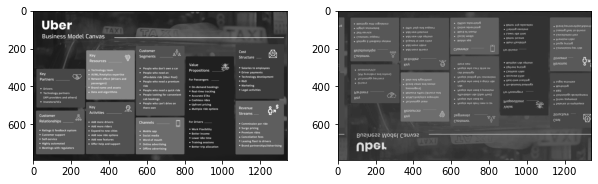

In [2]:
original_image = cv2.imread('images/business.jpg', cv2.IMREAD_GRAYSCALE)
transformed_image = cv2.imread('Transformed-image.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10,7))
plt.subplot(121)
plt.imshow(original_image, cmap='gray')

plt.subplot(122)
plt.imshow(transformed_image, cmap='gray')

In [64]:
def get_points(image, number_of_points):
    %matplotlib
    fig, ax = plt.subplots(1, figsize=(10,7))
    plt.imshow(image)
    pts = np.round(plt.ginput(n=number_of_points))
    print(pts)
    pts = pts[:,[1,0]].T
    plt.close()
    return pts

In [66]:
pts = get_points(original_image, 4)

Using matplotlib backend: MacOSX
[[464. 305.]
 [493. 312.]
 [485. 369.]
 [483. 417.]]


In [68]:
pts.T[:,[1,0]]

array([[464., 305.],
       [493., 312.],
       [485., 369.],
       [483., 417.]])

[[4, 5, 6]]